In [1]:
# initial settings
#Note the installation of the forecast packages takes a while
library_path <- paste(getwd(), "packages",sep="/")
dir.create(library_path,showWarnings = FALSE)
.libPaths(library_path)

if(!require(tidyverse)){
    install.packages("tidyverse")
    library(tidyverse)
}
if(!require(repr)){
    install.packages("repr")
    library(repr)
}
if(!require(tree)){
    install.packages("tree")
    library(tree)
}
if(!require(rpart)){
    install.packages("rpart")
    library(rpart)
}
if(!require(rpart.plot)){
    install.packages("rpart.plot")
    library(rpart.plot)
}
if(!require(caret)){
    install.packages("caret")
    library(caret)
}
if(!require(precrec)){
    install.packages("precrec")
    library(precrec)
}
if(!require(e1071)){
    install.packages("e1071")
    library(e1071)
}



#library(tidyverse)
#library(tree)
#library(rpart)
#library(rpart.plot)
#library(caret)

#install.packages('precrec',lib='.', verbose=TRUE)
#library(precrec,lib.loc='.')




#Plot size deppening on your screen resolution to 5 x 3
options(repr.plot.width=9, repr.plot.height=6)


Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: repr

Loading required package: tree

Loading required package: rpart

Loading required package: rpart.plot

Loading required package: caret

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Loading required package: precrec

Loading required package: e1071



# Welcome to Day 2 ML Workshop


### Exercise 1: Build Classification Trees


Read in the `Mowner01.csv` file. Since there are only 24 observations in the data set, print the whole data set. Notice that the variable Owner in the data frame Mower takes the values 1 and 0. 1 means the relevant household owns a ride-on mower, while 0 means it does not. Create a factor variable out of `Owner`. Hint: `labels = c("Noowner", "Owner")`






In [2]:
### BEGIN SOLUTION
mowner.df <- read.table("Mowner01.csv", header=TRUE, sep =",")
mowner.df
### END SOLUTION

HH_ID,Income,Lot_Size,Owner
<int>,<dbl>,<dbl>,<int>
1,60.0,18.4,1
2,85.5,16.8,1
3,64.8,21.6,1
4,61.5,20.8,1
5,87.0,23.6,1
6,110.1,19.2,1
7,108.0,17.6,1
8,82.8,22.4,1
9,69.0,20.0,1


In [3]:
### BEGIN SOLUTION
mowner.df$Owner<-factor(mowner.df$Owner,levels = c(0,1),labels = c("Noowner", "Owner"))
head(mowner.df,15)
### END SOLUTION


,HH_ID,Income,Lot_Size,Owner
,<int>,<dbl>,<dbl>,<fct>
1,1,60.0,18.4,Owner
2,2,85.5,16.8,Owner
3,3,64.8,21.6,Owner
4,4,61.5,20.8,Owner
5,5,87.0,23.6,Owner
6,6,110.1,19.2,Owner
7,7,108.0,17.6,Owner
8,8,82.8,22.4,Owner
9,9,69.0,20.0,Owner


Let's now build a tree with only `Income` and `Lot_Size` as predictors.

In [4]:
tree_model<-rpart(Owner ~ Income + Lot_Size,
                 data=mowner.df,
                 method="class",
                 control=rpart.control(minsplit  = 5, #the minimum number of observations that must exist in a node in order for a split to be attempted.  
                                       minbucket = 5, # the minimum number of observations in any terminal <leaf> node. 
                                       xval = 1)) # to use all samples for the first try out
tree_model

n= 24 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 24 12 Noowner (0.5000000 0.5000000)  
  2) Income< 59.7 8  1 Noowner (0.8750000 0.1250000) *
  3) Income>=59.7 16  5 Owner (0.3125000 0.6875000)  
    6) Lot_Size< 19.8 9  4 Noowner (0.5555556 0.4444444) *
    7) Lot_Size>=19.8 7  0 Owner (0.0000000 1.0000000) *

Let's plot the tree, this is one of the few times we make use of the R-base graphics

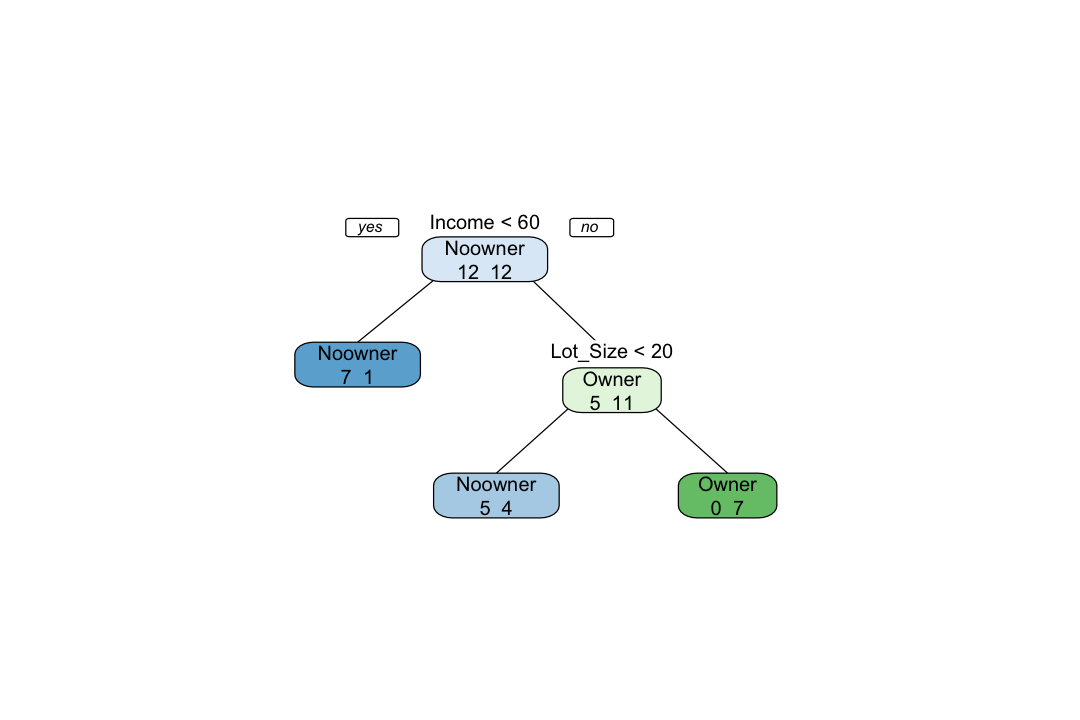

In [5]:
rpart.plot(tree_model,
           fallen.leaves = FALSE, # to position the leaf nodes at the bottom of the graph changes this to TRUE
           type  = 1, # 1 Label all nodes, not just leaves.
           extra = 1, # 1 Display the number of observations that fall in the node 
           split.font = 1, # Font for the split labels. 1=normal 2=bold
           varlen = -10) # Length of variable names in text at the splits (and, for class responses, the class in the node label). Default -8, meaning truncate to eight characters. 


* Your plotted tree should have 3 leaf nodes and 1 decision node and 1 root node. 
* Note that at each decision node, as regards the answer to the question at the node, Yes is to the left and No is to the right.
* You can see the number of observation at each leaf node that represent the actual observations of each partition


####  Using the tree to “predict” the value of Owner in the dataset Mower

Having built and graphed the model, use it to predict the value of the target variable for all the cases in the original data frame. This is done as follows:

In [6]:
treePred.class <- predict(tree_model, data = Mowner, type = "class")
head(treePred.class)

1       2       3       4       5       6 
Noowner Noowner   Owner   Owner   Owner Noowner 
Levels: Noowner Owner

Thus the arguments of predict are:
* tree_model , the  tree being used for the prediction;
* Mowner, the data from which the prediction is being made. For this example, we are using the data that was used to build the tree, but there are good reasons to use other data here that has not been used in constructing the tree. See later.
* Since this is a classification rather than a regression tree, the type is “class”
* The predicted classes got created assuming a **cutoff** of 0.5 of the score.


This prediction though, represent an underlying score cut off. Compare the result below and above. To see the predicted score use:

In [7]:
treePred.score <- predict(tree_model, data = Mowner, type = "prob")
head(treePred.score)

,Noowner,Owner
1,0.5555556,0.4444444
2,0.5555556,0.4444444
3,0.0000000,1.0000000
4,0.0000000,1.0000000
5,0.0000000,1.0000000
6,0.5555556,0.4444444


It is common to analyse the score in terms of the **1** Class, in our case **Owner**

In [8]:
ownerScore <- treePred.score[,2]
head(ownerScore)

1         2         3         4         5         6 
0.4444444 0.4444444 1.0000000 1.0000000 1.0000000 0.4444444

A common way of plotting the predicted score is the Receiver Operating Characteristic Curve **ROC** Curve. The area under the curve **AUC** is a possible measure of comparision. Higher number means better accuracy. This is a good measure if you are interested to be highly accurate across all cases. If you are only interested in a few cases, like the ones you are the most sure about (highest score), the criteria is called **top k precision**. We will discuss this later. To plot an ROC curve:

modnames,dsids,curvetypes,aucs
<chr>,<dbl>,<chr>,<dbl>
m1,1,ROC,0.8715278


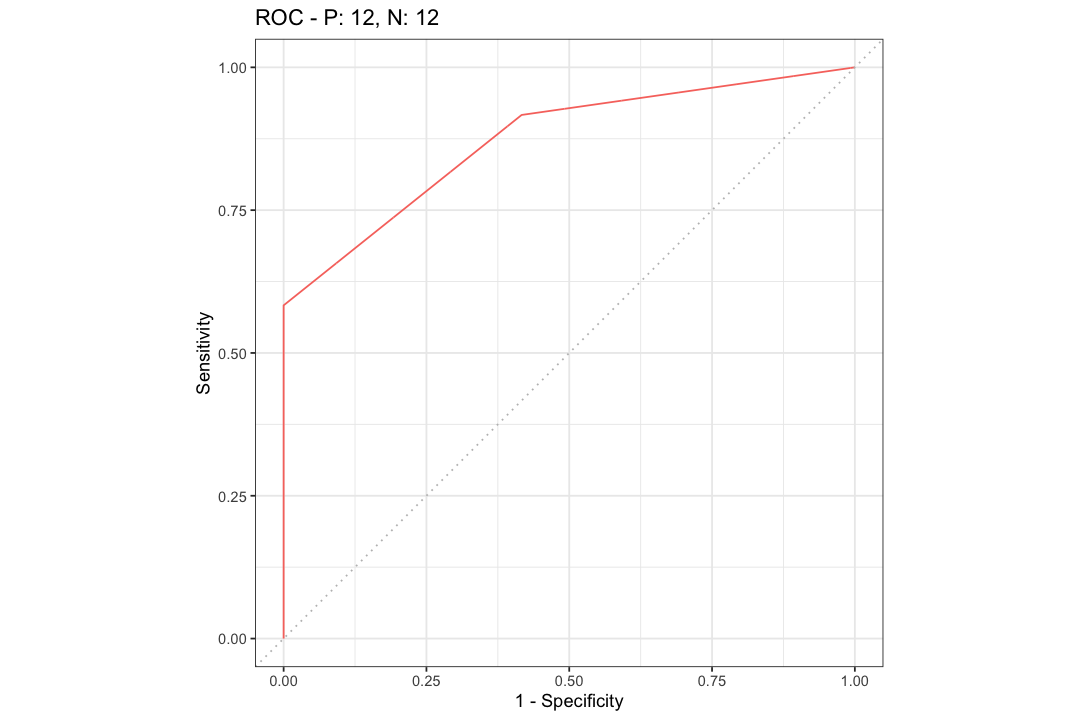

In [9]:
sscurves <- evalmod(scores = ownerScore, labels = mowner.df$Owner)
autoplot(sscurves, "ROC")
auc(sscurves) %>% filter(curvetypes=='ROC')

The default cutoff is 0.5. Depending on your problem you are trying to solve, a different cutoff results in higher accuracy. To calculate it with 0.5:

In [10]:
confusionMatrix(mowner.df$Owner,factor( ifelse(ownerScore > 0.5, "Owner", "Noowner") ),positive = 'Owner')

Confusion Matrix and Statistics

          Reference
Prediction Noowner Owner
   Noowner      12     0
   Owner         5     7
                                          
               Accuracy : 0.7917          
                 95% CI : (0.5785, 0.9287)
    No Information Rate : 0.7083          
    P-Value [Acc > NIR] : 0.25644         
                                          
                  Kappa : 0.5833          
                                          
 Mcnemar's Test P-Value : 0.07364         
                                          
            Sensitivity : 1.0000          
            Specificity : 0.7059          
         Pos Pred Value : 0.5833          
         Neg Pred Value : 1.0000          
             Prevalence : 0.2917          
         Detection Rate : 0.2917          
   Detection Prevalence : 0.5000          
      Balanced Accuracy : 0.8529          
                                          
       'Positive' Class : Owner           
            

Or 0.30:

In [11]:
confusionMatrix(mowner.df$Owner,factor( ifelse(ownerScore > 0.3, "Owner", "Noowner") ),positive = 'Owner')

Confusion Matrix and Statistics

          Reference
Prediction Noowner Owner
   Noowner       7     5
   Owner         1    11
                                          
               Accuracy : 0.75            
                 95% CI : (0.5329, 0.9023)
    No Information Rate : 0.6667          
    P-Value [Acc > NIR] : 0.2632          
                                          
                  Kappa : 0.5             
                                          
 Mcnemar's Test P-Value : 0.2207          
                                          
            Sensitivity : 0.6875          
            Specificity : 0.8750          
         Pos Pred Value : 0.9167          
         Neg Pred Value : 0.5833          
             Prevalence : 0.6667          
         Detection Rate : 0.4583          
   Detection Prevalence : 0.5000          
      Balanced Accuracy : 0.7812          
                                          
       'Positive' Class : Owner           
            

Let's say we want to reach out only to those owners we are very sure about owning a mowner; the purpose is to offer them an upgrade. As our marketing team has limited resources, we cannot contact all 24 but can contact 5. In this case, we are interested in the precision at top k, where k equals 5. The precision-recall curve plot helps us with that:

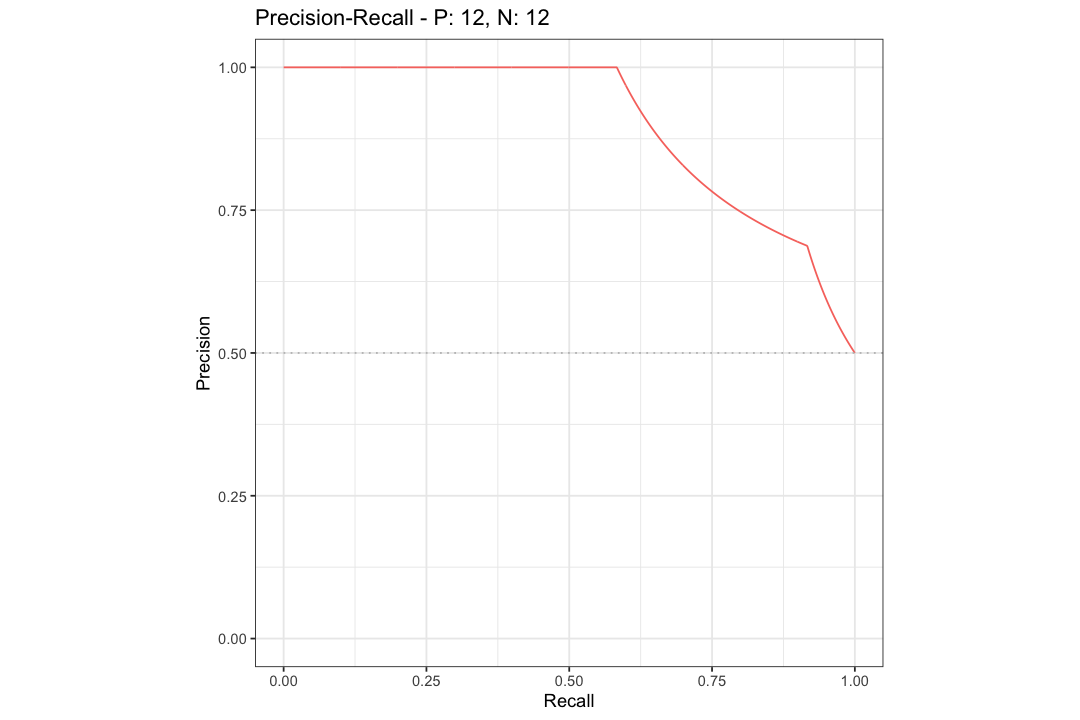

In [12]:
autoplot(sscurves, "PRC")


You can see above that if we rank all our predictions in terms of score, and look at the first ones, we would be correct. Note: The reason is, as this is not a real test, we are using the same data we used for learning the tree for testing. 

### Exercise 2: Cross-validation

In the current example, we have just 24 observations. We want to create a tree and test how well it does on test data that was not used in the construction. We will demonstrate how to choose the size of the tree by performing 4-fold cross-validation.  
The average across folds yields a more stable result than just using the validation set once. 
We divide the data into four groups of 6 observations each. Call them A, B, C, and D. 
We then use only the 18 observations from B, C, and D in choosing trees pruned to various sizes. We test how well these trees do at predicting the observations in A. This is one “fold”. 
We then use the 18 observations in A, C and D, and test how well these trees do in predicting the observations in B. This is another “fold”. And so on.   
In this case, we do not have a time component, so we can randomly split up the data. To make sure that we are having reproducable results, set the random seed.

In [13]:
set.seed(3800)
cv.ct<-rpart(Owner ~ Income + Lot_Size,
                 data=mowner.df,
                 method="class",      
                 control=rpart.control(minsplit  = 2, #the minimum number of observations that must exist in a node in order for a split to be attempted.  
                                       minbucket = 4, # the minimum number of observations in any terminal <leaf> node. 
                                       xval = 4))     # number of cross-validations. 

To print the result:

In [14]:
printcp(cv.ct)


Classification tree:
rpart(formula = Owner ~ Income + Lot_Size, data = mowner.df, 
    method = "class", control = rpart.control(minsplit = 2, minbucket = 4, 
        xval = 4))

Variables actually used in tree construction:
[1] Income   Lot_Size

Root node error: 12/24 = 0.5

n= 24 

     CP nsplit rel error  xerror    xstd
1 0.500      0      1.00 1.50000 0.17678
2 0.125      1      0.50 0.91667 0.20341
3 0.010      3      0.25 0.75000 0.19764


We are looking for the configuration with the lowers cross validation error, column `xerror`.  

In [15]:
pruned.ct <- prune(cv.ct, cp = 0.010)
pruned.ct

n= 24 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 24 12 Noowner (0.5000000 0.5000000)  
   2) Income< 59.7 8  1 Noowner (0.8750000 0.1250000) *
   3) Income>=59.7 16  5 Owner (0.3125000 0.6875000)  
     6) Lot_Size< 19.8 9  4 Noowner (0.5555556 0.4444444)  
      12) Income< 79.5 5  1 Noowner (0.8000000 0.2000000) *
      13) Income>=79.5 4  1 Owner (0.2500000 0.7500000) *
     7) Lot_Size>=19.8 7  0 Owner (0.0000000 1.0000000) *

And plot it again:

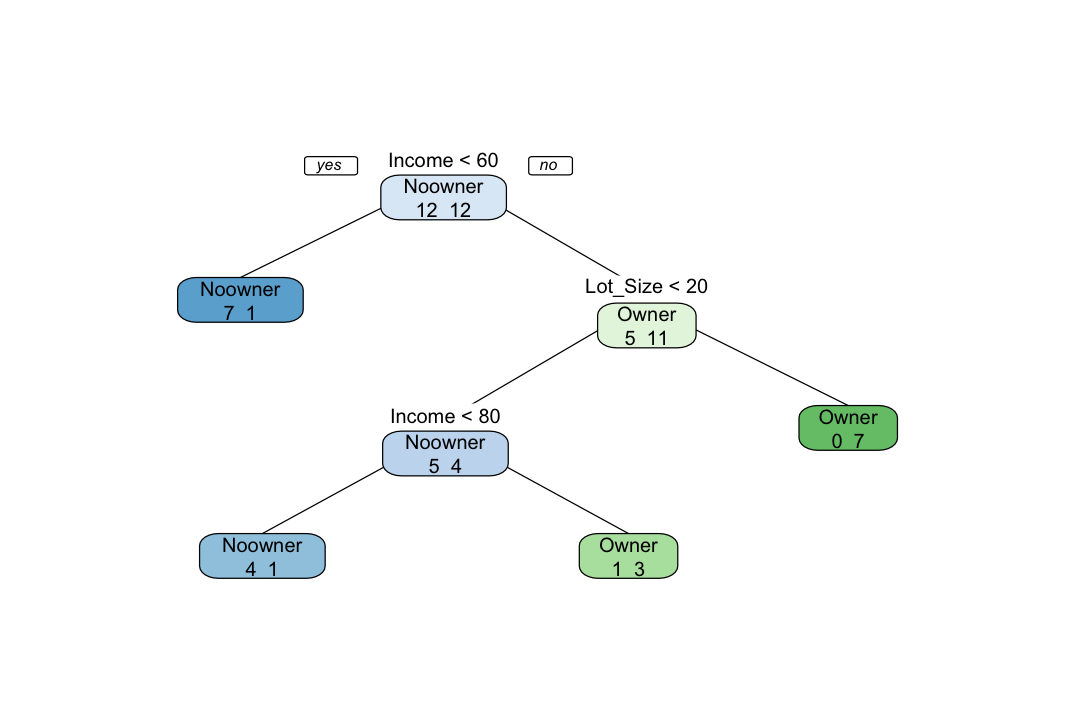

In [16]:
rpart.plot(pruned.ct,
           fallen.leaves = FALSE, # to position the leaf nodes at the bottom of the graph changes this to TRUE
           type  = 1, # 1 Label all nodes, not just leaves.
           extra = 1, # 1 Display the number of observations that fall in the node 
           split.font = 1, # Font for the split labels. 1=normal 2=bold
           varlen = -10) # Length of variable names in text at the splits (and, for class responses, the class in the node label). Default -8, meaning truncate to eight characters. 


And checking if the accuracy improved or not:

modnames,dsids,curvetypes,aucs
<chr>,<dbl>,<chr>,<dbl>
m1,1,ROC,0.9097222


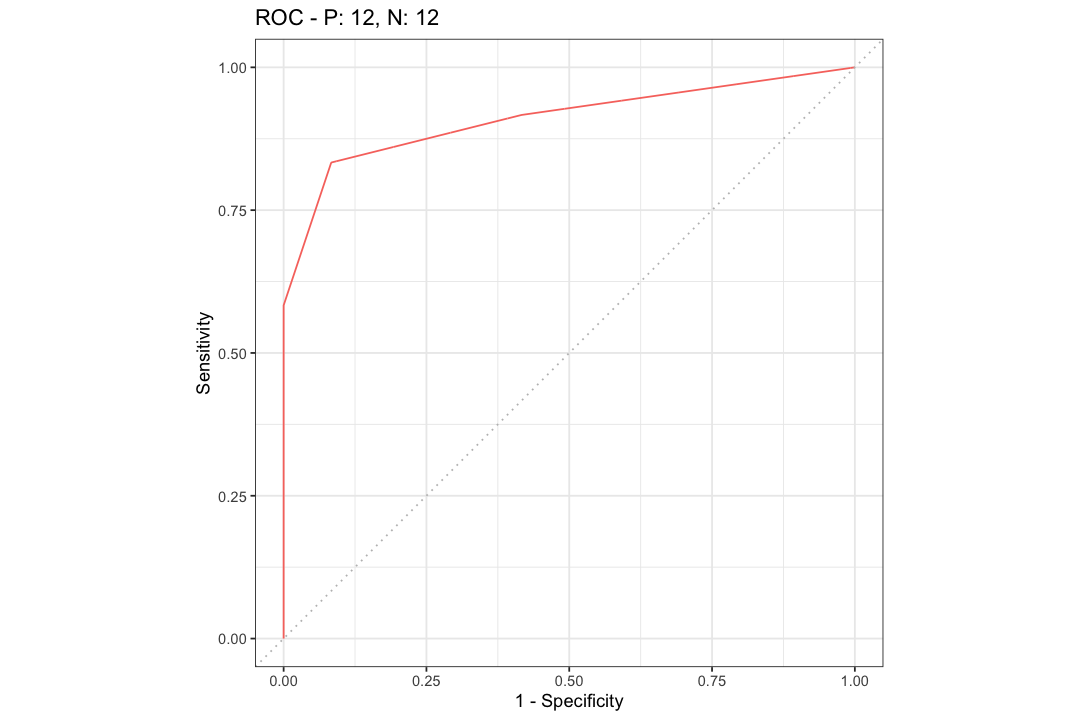

In [18]:
treePred.score <- predict(pruned.ct, data = Mowner, type = "prob")
ownerScore <- treePred.score[,2]

sscurves <- evalmod(scores = ownerScore, labels = mowner.df$Owner)
autoplot(sscurves, "ROC")
auc(sscurves) %>% filter(curvetypes=='ROC')

There are a lot of packages in R with different cross validation strategies, this is just one of them.